In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
# Loading the datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Ripe2/Train_Set',
    labels="inferred",
    label_mode="categorical", 
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True
)

Found 7839 files belonging to 22 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
   '/content/drive/MyDrive/Ripe2/Validation_Set',
   labels="inferred",
   label_mode="categorical",
   color_mode="rgb",
   batch_size=32,
   image_size=(64, 64),
   shuffle=True
)

Found 874 files belonging to 22 classes.


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Ripe2/Test_Set',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True
)

Found 874 files belonging to 22 classes.


In [ ]:
#No of classes
classes = len(training_set.class_names)
print(f"Number of classes: {classes}")

Number of classes: 22


In [39]:
# Building the CNN model
cnn = tf.keras.models.Sequential()

In [40]:
# Convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3])) #relu it activates negative values to zero
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

c:\Users\Rishitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [42]:
# Flattening and fully connected layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [43]:
# Output layer for fruit classification
cnn.add(tf.keras.layers.Dense(units=classes, activation='softmax'))

In [44]:
# Compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Model summary
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,625,590 (25.27 MB)

 Trainable params: 6,625,590 (25.27 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Training the model
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=32)

Epoch 1/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 46s 182ms/step - accuracy: 0.0497 - loss: 12.3101 - val_accuracy: 0.0881 - val_loss: 2.9931
Epoch 2/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.1010 - loss: 2.9007 - val_accuracy: 0.1293 - val_loss: 2.8182
Epoch 3/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 30s 122ms/step - accuracy: 0.1301 - loss: 2.7862 - val_accuracy: 0.1419 - val_loss: 2.7777
Epoch 4/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - accuracy: 0.1622 - loss: 2.6731 - val_accuracy: 0.1705 - val_loss: 2.6687
Epoch 5/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step - accuracy: 0.2143 - loss: 2.5076 - val_accuracy: 0.2162 - val_loss: 2.5894
Epoch 6/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.2917 - loss: 2.2893 - val_accuracy: 0.2265 - val_loss: 2.5169
Epoch 7/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - accuracy: 0.3729 - loss: 2.0313 - val_accuracy: 0.2551 - val_loss: 2.5266
Epoch 8/32
245/245 ━━━━━━━━━━━━━━━━━━━━ 37s 150ms/step - accuracy: 0.4536 - loss: 

In [47]:
# Evaluating the model
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

245/245 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9417 - loss: 0.1734
Training accuracy: 0.9469320178031921


In [48]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4116 - loss: 2.9095
Validation accuracy: 0.4004576802253723


In [49]:
# Saving the model
cnn.save('fruit_classification.h5')

In [ ]:
# Recording history in JSON
import json
with open('model_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [51]:
# Calculating accuracy on validation set
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1] * 100))

Validation set Accuracy: 40.04576802253723 %


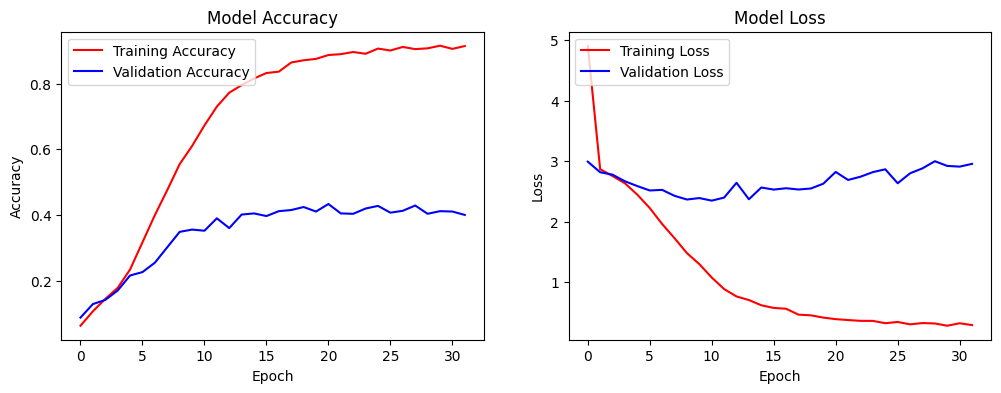

In [64]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss', color='red')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [54]:
# Evaluating on test set
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.3957 - loss: 2.9872
Test accuracy: 0.4004576802253723


In [ ]:
# Loading the trained model
cnn = tf.keras.models.load_model('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


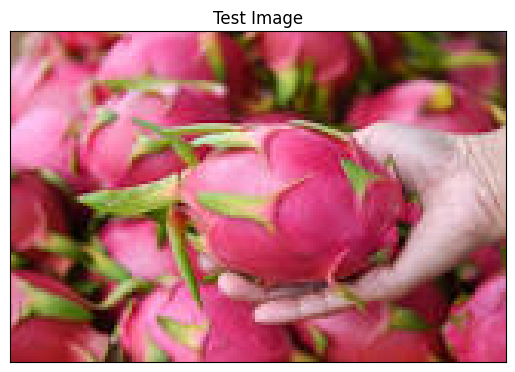

[[3.0252482e-07 3.2902092e-10 9.9998486e-01 1.2009802e-11 1.4791567e-11
  1.3341440e-08 8.7098515e-09 2.0657330e-11 4.0696814e-11 4.6942327e-07
  2.5395839e-06 5.3390528e-09 9.1093582e-13 1.1746634e-05 1.3830004e-11
  6.8581005e-15 1.9744239e-12 1.6035167e-14 2.1370113e-13 9.1702676e-13
  1.8739774e-08 1.3669390e-09]]
2
It's a ripe dragon


In [ ]:
image_path = '/content/drive/MyDrive/Ripe2/Ripe/ripe dragon/4.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()
print(predictions)
result_index = np.argmax(predictions)
print(result_index)
print("It's a {}".format(test_set.class_names[result_index]))